In [42]:
import numpy as np

# FUNCTIONS

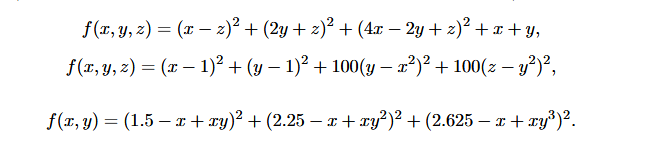

In [190]:
def f1(x, y, z):
    return (x - z) ** 2 + (2*y + z) ** 2 + (4*x -2*y + z) ** 2 + x + y

#min: -19/96 at [-1/6, -11/48, 1/6]

def f2(x, y, z):
    return ((x - 1) ** 2) + ((y - 1) ** 2) + 100*((y - (x ** 2)) ** 2) + 100*((z - (y ** 2)) ** 2)

#min: 0 at [1, 1, 1]

def f3(x, y):
    return (1.5 - x + x*y) ** 2 + (2.25 - x + x*(y ** 2)) ** 2 + (2.625 - x + x*(y ** 3)) ** 2

#min: 0 at [3, 0.5]


def func(x, y):
    return x**2 + np.e**x + y**2 -x*y

# 2D NELDER MEAD

I will first implement only the 2 dimensional version in order to try to figure out the core logics.

In [211]:
def nelder_mead_2d(v1, v2, v3, f):

    points = np.array([v1, v2, v3])

    #the loop should start here
    for i in range(20):
        zs = []
        
        for point in points:
            zs.append(f(*point))

        zs = np.array(zs)
        sorted_indices = np.argsort(zs)

        zs[:] = zs[sorted_indices]
        points[:] = points[sorted_indices]
        best = points[0]
        good = points[1]
        worst = points[2]

        #Sanity check
        # print(best, f(*best))
        # print(good, f(*good))
        # print(worst, f(*worst))

        M = (best + good) / 2
        R = 2*M - worst
        E = 2*R - M
        # print(M, R, E)

        yr = f(*R)
        ye = f(*E)

        if yr < zs[0]:
            if ye < yr:
                next_point = E
            else:
                next_point = R
            points[-1] = next_point
        
        elif yr < zs[1]:
            points[-1] = R
        
        elif yr < zs[2]:
            oc = worst + 3/2 * (M - worst)
            yoc = f(*oc)
            if yoc < yr:
                points[-1] = oc
            else: #shrink
                for i in range(1, len(points)):
                    points[i] = 0.5 * (points[0] + points[i])

        else:
            k = worst + 1/2 * (M - worst)
            yk = f(*k)
            if yk < zs[-1]:
                points[-1] = k
            else: #shrink
                for i in range(1, len(points)):
                    points[i] = 0.5 * (points[0] + points[i])

        print(f(*best), best)

In [210]:
test_point1 = np.array([1, 1])
test_point2 = test_point1 + np.array([1, 0])
test_point3 = test_point1 + np.array([0, 1])

nelder_mead_2d(test_point1, test_point2, test_point3, f3)


14.203125 [1 1]
0.703125 [2 0]
0.703125 [2 0]
0.703125 [2 0]
0.703125 [2 0]
0.703125 [2 0]
0.703125 [2 0]
0.703125 [2 0]
0.703125 [2 0]
0.703125 [2 0]
0.703125 [2 0]
0.703125 [2 0]
0.703125 [2 0]
0.703125 [2 0]
0.703125 [2 0]
0.703125 [2 0]
0.703125 [2 0]
0.703125 [2 0]
0.703125 [2 0]
0.703125 [2 0]


In [ ]:
# test_point1 = np.array([1, 1])
# test_point2 = test_point1 + np.array([2, 0])
# test_point3 = test_point1 + np.array([0, 2])


nelder_mead_2d(test_point1, test_point2, test_point3, f3)


[1 1] 14.203125
[3 1] 14.203125
[1 3] 936.703125
14.203125 [1 1]
[2 0] 0.703125
[1 1] 14.203125
[3 1] 14.203125
0.703125 [2 0]
[2 0] 0.703125
[1 1] 14.203125
[0 0] 14.203125
0.703125 [2 0]
[2 0] 0.703125
[1 1] 14.203125
[0 0] 14.203125
0.703125 [2 0]
[2 0] 0.703125
[1 1] 14.203125
[0 0] 14.203125
0.703125 [2 0]


In [214]:
def nelder_mead_3d(v1, v2, v3, v4, f):

    points = [v1, v2, v3, v4]

    #the loop should start here
    for i in range(300):
        zs = []
        
        for point in points:
            zs.append(f(*point))

        sorted_indices = np.argsort(zs)    

        best = points[sorted_indices[0]]
        good = points[sorted_indices[-2]]
        worst = points[sorted_indices[-1]]

        #Sanity check
        # print(best, f(*best))
        # print(good, f(*good))
        # print(worst, f(*worst))

        M = (best + good) / 2
        R = 2*M - worst
        E = 2*R - M
        # print(M, R, E)

        yr = f(*R)
        ye = f(*E)

        zs.sort() #sort them so i can easily compare the values

        if yr < zs[0]:
            if ye < yr:
                next = E
            else:
                next = R
            points[-1] = next
        
        elif yr < zs[1]:
            next = R
            points[-1] = next
        
        elif yr < zs[2]:
            oc = worst + 3/2 * (M - worst)
            yoc = f(*oc)
            if yoc < yr:
                next = oc
            points[-1] = next
        else: #shrink
            good = 1/2 * (best + good)
            worst = 1/2 * (best + worst)
            points = [best, good, worst]

        print(f(*best), best)

In [216]:
test_point1 = np.array([0, 0, 0])
test_point2 = np.array([1, 0, 0])
test_point3 = np.array([3, 2, 0])
test_point4 = np.array([4, 4, 0])

nelder_mead_3d(test_point1, test_point2, test_point3, test_point4, f1)

0 [0 0 0]
0 [0 0 0]
0 [0 0 0]
0 [0 0 0]
-0.08984375 [-0.1875 -0.25    0.    ]
-0.1318359375 [-0.09375 -0.125    0.     ]
-0.132568359375 [-0.140625 -0.1875    0.      ]
-0.13763427734375 [-0.1171875 -0.15625    0.       ]
-0.14105224609375 [-0.1015625 -0.15625    0.       ]
-0.14105224609375 [-0.1015625 -0.15625    0.       ]
-0.14105224609375 [-0.1015625 -0.15625    0.       ]
-0.14105224609375 [-0.1015625 -0.15625    0.       ]
-0.1413717269897461 [-0.10839844 -0.16015625  0.        ]
-0.1416471004486084 [-0.11279297 -0.16601562  0.        ]
-0.1418304443359375 [-0.11328125 -0.16796875  0.        ]
-0.14197516441345215 [-0.11376953 -0.16992188  0.        ]
-0.14208126068115234 [-0.11425781 -0.171875    0.        ]
-0.14214873313903809 [-0.11474609 -0.17382812  0.        ]
-0.14217758178710938 [-0.11523438 -0.17578125  0.        ]
-0.1421678066253662 [-0.11572266 -0.17773438  0.        ]
-0.1421194076538086 [-0.11621094 -0.1796875   0.        ]
-0.14203238487243652 [-0.11669922 -0.181